# Single Company Experiment
## AAPL - Apple Inc. 

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import sentisignal

## Configuration

In [4]:
# notebook-wide experiemental configuration
data_primary = '../../data/csv/stocktwits_twitter_withretweets_daily.csv'
data_symbology = '../../data/csv/symbology.csv'
data_pickles = '../../data/pickles/'
start_date = '2013-01-01'
end_date = '2015-01-01'

## Data preprocessing and merging

In [5]:
# get data
data_sentiment = sentisignal.subsample_data(data_primary, data_symbology, data_pickles, start_date, end_date, 'SYMBOL', ['AAPL'], False)
data_finance = sentisignal.get_data_finance('yahoo', ['AAPL'], start_date, end_date, '../../data/pickles/', False, 'NaN')
# preprocess data
sentisignal.preprocess_data_sentiment(data_sentiment)
sentisignal.preprocess_data_finance(data_finance)
# merge data
data_merged = sentisignal.merge_sentiment_finance(data_sentiment, data_finance, False, False, True)

Loaded from pre-created pickle
Loaded from pre-created pickle


In [6]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 34 columns):
SOURCE                           504 non-null object
SYMBOL_x                         504 non-null object
TIMESTAMP_UTC                    504 non-null object
BULLISH_INTENSITY                504 non-null float64
BEARISH_INTENSITY                504 non-null float64
BULL_MINUS_BEAR                  504 non-null float64
BULL_SCORED_MESSAGES             504 non-null int64
BEAR_SCORED_MESSAGES             504 non-null int64
BULL_BEAR_MSG_RATIO              504 non-null float64
TOTAL_SCANNED_MESSAGES           504 non-null int64
EXCHANGE                         504 non-null object
SECTOR                           504 non-null object
INDUSTRY                         504 non-null object
TITLE                            504 non-null object
DATE                             504 non-null datetime64[ns]
LOG_BULL_RETURN                  503 non-null float64
LOG_BEAR_RETURN                  503 

In [8]:
data_merged['EXCHANGE']

0      NASDAQ
1      NASDAQ
2      NASDAQ
3      NASDAQ
4      NASDAQ
5      NASDAQ
6      NASDAQ
7      NASDAQ
8      NASDAQ
9      NASDAQ
10     NASDAQ
11     NASDAQ
12     NASDAQ
13     NASDAQ
14     NASDAQ
15     NASDAQ
16     NASDAQ
17     NASDAQ
18     NASDAQ
19     NASDAQ
20     NASDAQ
21     NASDAQ
22     NASDAQ
23     NASDAQ
24     NASDAQ
25     NASDAQ
26     NASDAQ
27     NASDAQ
28     NASDAQ
29     NASDAQ
        ...  
474    NASDAQ
475    NASDAQ
476    NASDAQ
477    NASDAQ
478    NASDAQ
479    NASDAQ
480    NASDAQ
481    NASDAQ
482    NASDAQ
483    NASDAQ
484    NASDAQ
485    NASDAQ
486    NASDAQ
487    NASDAQ
488    NASDAQ
489    NASDAQ
490    NASDAQ
491    NASDAQ
492    NASDAQ
493    NASDAQ
494    NASDAQ
495    NASDAQ
496    NASDAQ
497    NASDAQ
498    NASDAQ
499    NASDAQ
500    NASDAQ
501    NASDAQ
502    NASDAQ
503    NASDAQ
Name: EXCHANGE, dtype: object

## Descriptive statistics
### Probability distributions functions (with histogram)

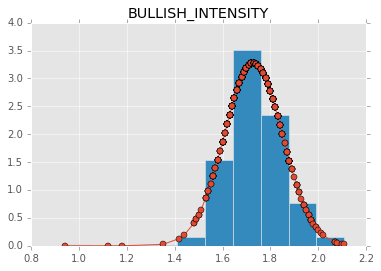

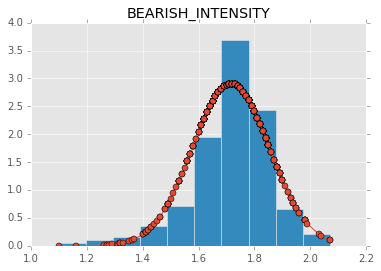

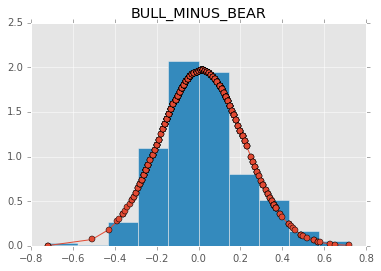

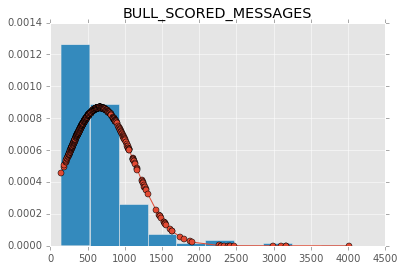

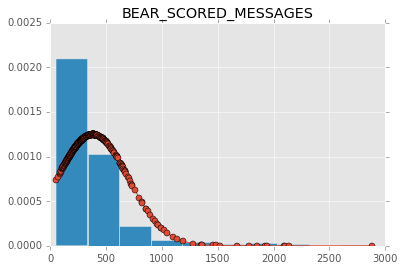

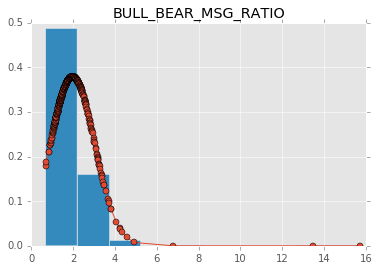

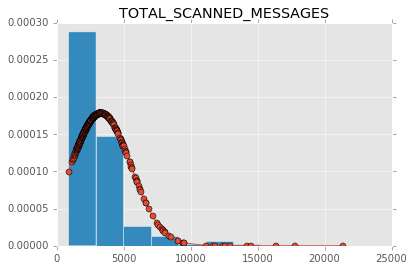

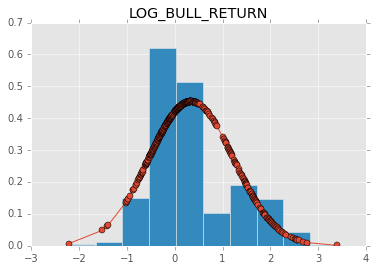

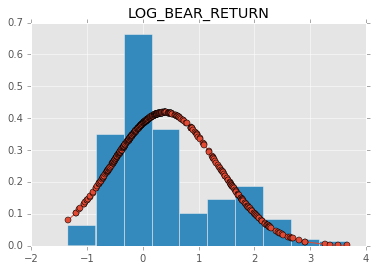

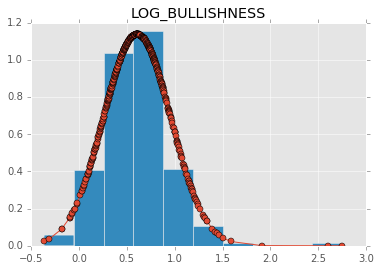

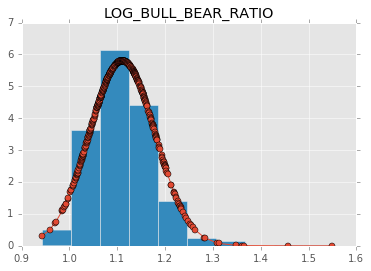

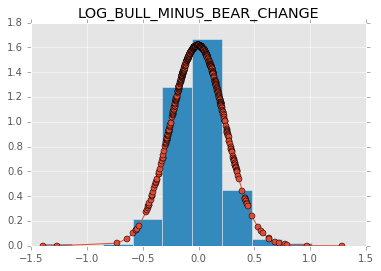

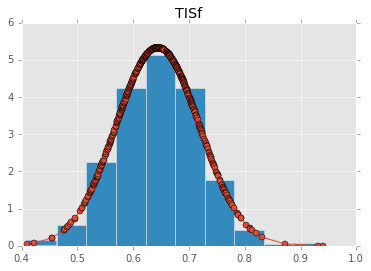

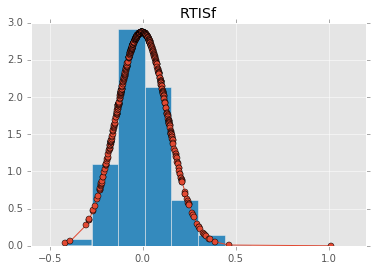

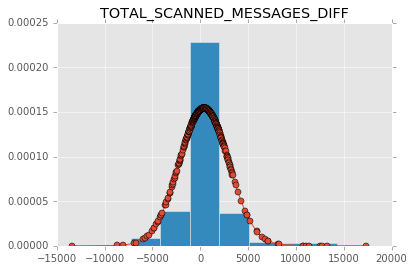

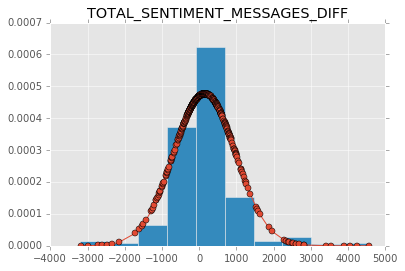

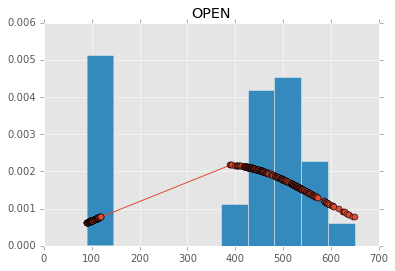

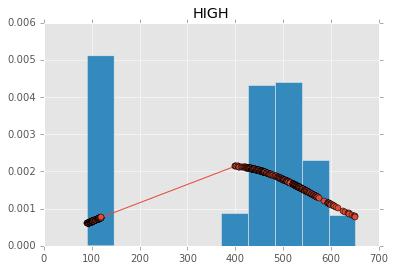

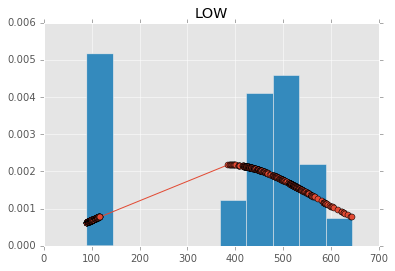

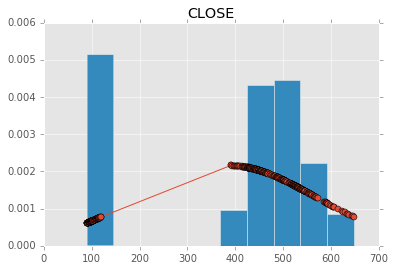

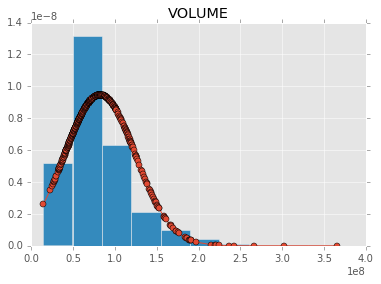

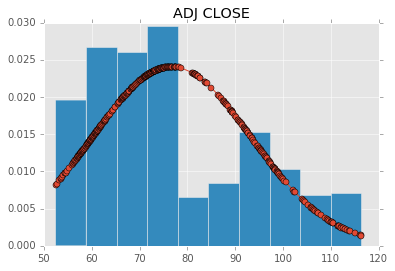

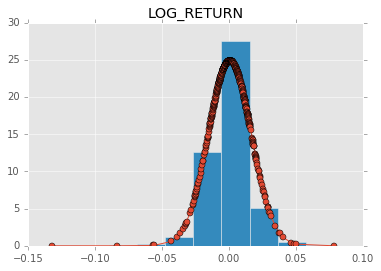

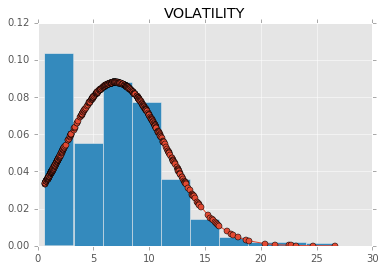

error


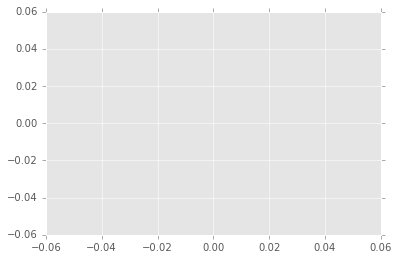

In [8]:
sentisignal.check_pdf(data_merged)

### Autocorrelation plots (x-axis: lag, y-axis: autocorrelation)

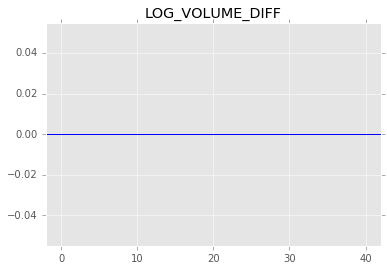

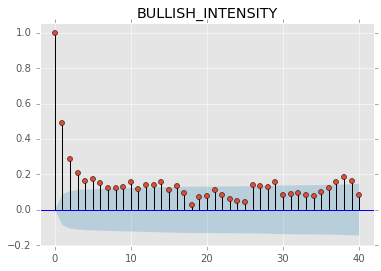

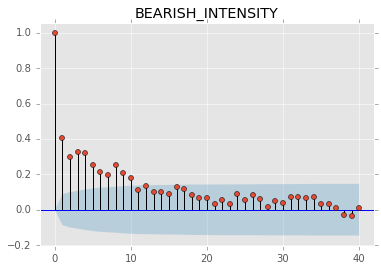

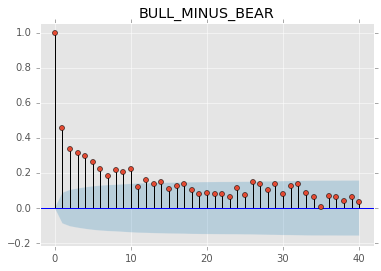

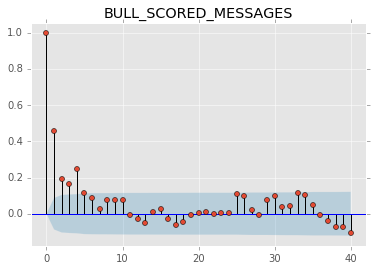

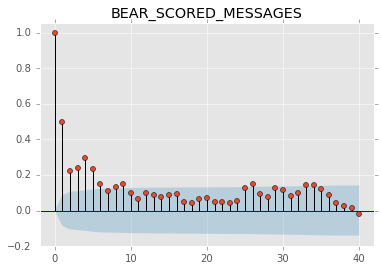

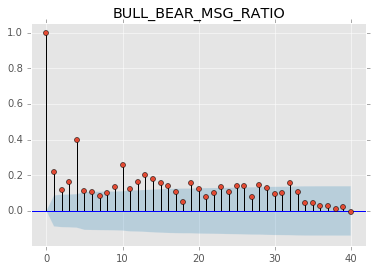

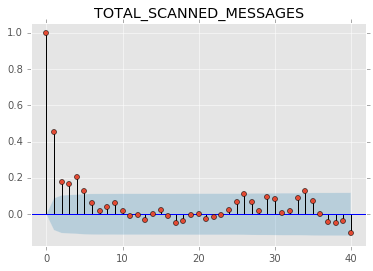

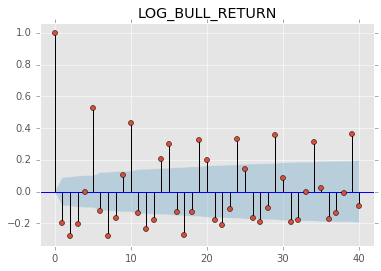

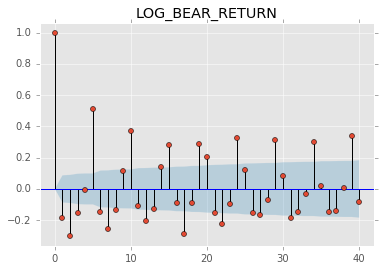

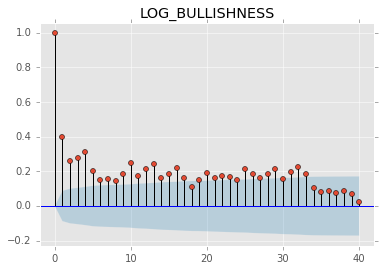

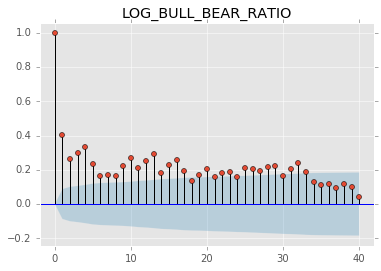

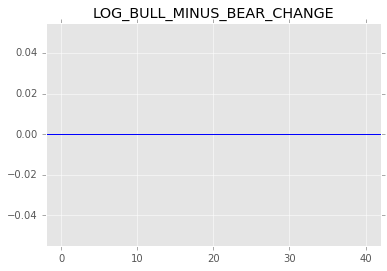

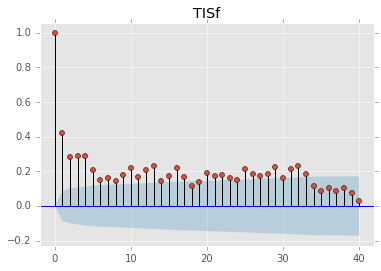

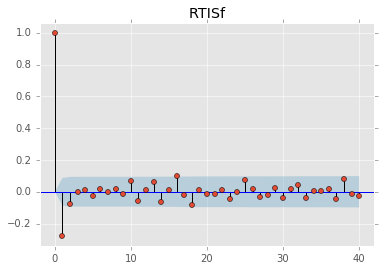

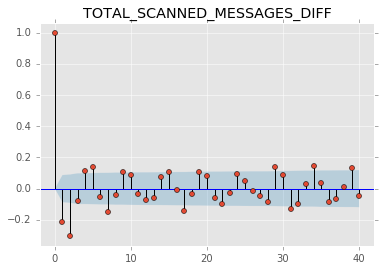

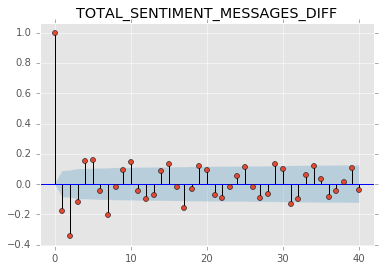

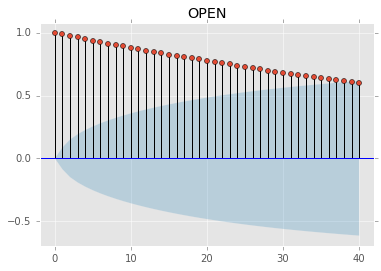

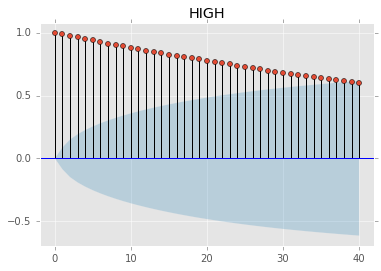

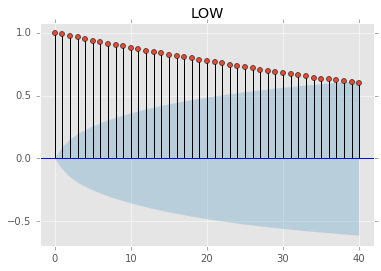

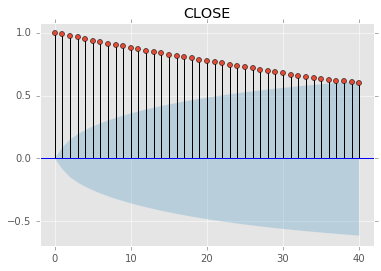

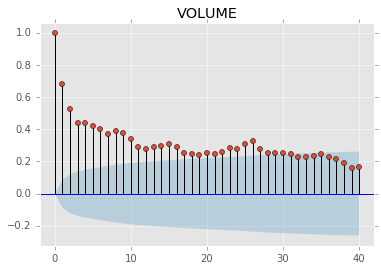

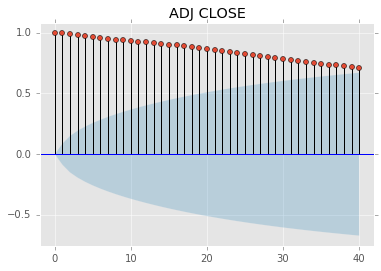

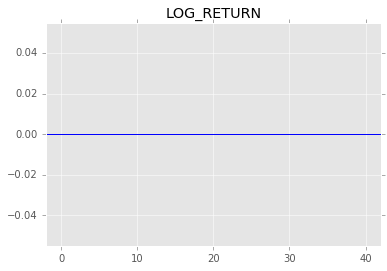

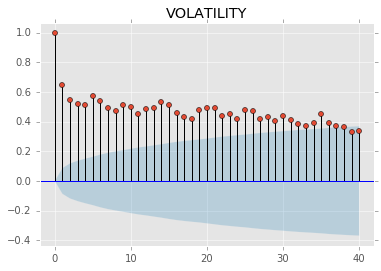

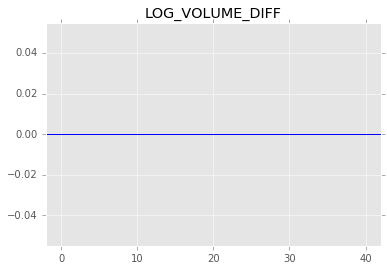

In [10]:
sentisignal.check_acf(data_merged)

In [11]:
sentisignal.adf_test(data_merged)

errror


,ADF
BULLISH_INTENSITY,"(-13.0586541025, 2.0693437538e-24, 0, 502, {u'..."
BEARISH_INTENSITY,"(-6.25520313546, 4.35596400137e-08, 3, 499, {u..."
BULL_MINUS_BEAR,"(-6.52323980002, 1.02964204691e-08, 3, 499, {u..."
BULL_SCORED_MESSAGES,"(-7.56957402356, 2.86501776753e-11, 4, 498, {u..."
BEAR_SCORED_MESSAGES,"(-6.82955139488, 1.9091642515e-09, 3, 499, {u'..."
BULL_BEAR_MSG_RATIO,"(-2.98154802114, 0.0366538845114, 14, 488, {u'..."
TOTAL_SCANNED_MESSAGES,"(-7.70287561765, 1.32494701731e-11, 3, 499, {u..."
LOG_BULL_RETURN,"(-5.94202893251, 2.24916157229e-07, 18, 484, {..."
LOG_BEAR_RETURN,"(-5.20042053947, 8.77471915421e-06, 18, 484, {..."
LOG_BULLISHNESS,"(-3.15707676525, 0.0226076066923, 15, 487, {u'..."


## Correlation analysis

In [12]:
res_corr = sentisignal.correlation_analysis(data_merged, 0.4, data_sentiment, data_finance)

[['BEAR_SCORED_MESSAGES', 'VOLUME', 0.75049907070089983],
 ['BULL_SCORED_MESSAGES', 'VOLUME', 0.66968899902686196],
 ['TOTAL_SCANNED_MESSAGES', 'VOLUME', 0.66388252938709114],
 ['BULL_SCORED_MESSAGES', 'LOG_VOLUME_DIFF', 0.50941624419130171],
 ['BEAR_SCORED_MESSAGES', 'LOG_VOLUME_DIFF', 0.50161361381734704],
 ['TISf', 'LOG_RETURN', 0.48936651641776757],
 ['TOTAL_SCANNED_MESSAGES', 'LOG_VOLUME_DIFF', 0.47693646973224152],
 ['LOG_BULLISHNESS', 'LOG_RETURN', 0.46244891874894267],
 ['BEAR_SCORED_MESSAGES', 'VOLATILITY', 0.42980996769512186],
 ['LOG_BULL_BEAR_RATIO', 'LOG_RETURN', 0.42687678636869736],
 ['BULL_MINUS_BEAR', 'LOG_RETURN', 0.40632050432457362],
 ['BULL_MINUS_BEAR', 'ADJ CLOSE', 0.40357785129143947]]


In [13]:
# intensity
print res_corr['BULL_MINUS_BEAR']['LOG_RETURN']
print res_corr['BULL_MINUS_BEAR']['VOLUME']
# volume
print res_corr['LOG_BULLISHNESS']['LOG_RETURN']
print res_corr['LOG_BULLISHNESS']['VOLUME']
#


0.406320504325
-0.270249261696
0.462448918749
-0.244353852537


## Information surplus gain (Mutual Information)

### Determine optimal bin size

In [14]:
print "Sturge: ", sentisignal.sturges_bin(data_merged)
print "Doanes: ", sentisignal.doane_bin(data_merged['BULL_MINUS_BEAR'].ix[1:])

Sturge:  10.0
Doanes:  11.0


In [15]:
a_sent_price_0 = sentisignal.information_surplus(data_merged, 5, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1, True)
a_sent_price_0

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.192647,0
1,-0.118986,-61.763608,0.073661,-1
2,-0.129528,-67.235942,0.063119,-2
3,-0.131463,-68.240449,0.061184,-3
4,-0.130644,-67.815105,0.062003,-4
5,-0.139539,-72.432670,0.053108,-5


In [16]:
sentisignal.save_information_surplus(data_pickles, a_sent_price_0, 'AAPL', start_date, end_date, 5, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1, True, 0)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_BULL_MINUS_BEAR_LOG_RETURN_-1_True.p


In [17]:
a_sent_vol_0 = sentisignal.information_surplus(data_merged, 5, 'BULL_MINUS_BEAR', 'VOLUME', -1, True)
a_sent_vol_0

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.110039,0
1,0.006012,5.463220,0.116050,-1
2,0.002900,2.635358,0.112939,-2
3,-0.005042,-4.582063,0.104997,-3
4,0.028807,26.178855,0.138846,-4
5,-0.005644,-5.129222,0.104395,-5


In [18]:
sentisignal.save_information_surplus(data_pickles, a_sent_vol_0, 'AAPL', start_date, end_date, 5, 'BULL_MINUS_BEAR', 'VOLUME', -1, True, 0)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_BULL_MINUS_BEAR_VOLUME_-1_True.p


In [19]:
a_vol_price_0 = sentisignal.information_surplus(data_merged, 5, 'LOG_BULLISHNESS', 'LOG_RETURN', -1, True)
a_vol_price_0

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.214358,0
1,-0.138789,-64.746617,0.075568,-1
2,-0.161728,-75.447704,0.052630,-2
3,-0.166202,-77.534981,0.048155,-3
4,-0.173539,-80.957714,0.040819,-4
5,-0.155467,-72.526840,0.058891,-5


In [20]:
sentisignal.save_information_surplus(data_pickles, a_vol_price_0, 'AAPL', start_date, end_date, 5, 'LOG_BULLISHNESS', 'LOG_RETURN', -1, True, 0)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_LOG_BULLISHNESS_LOG_RETURN_-1_True.p


In [21]:
a_vol_vol_0 = sentisignal.information_surplus(data_merged, 5, 'LOG_BULLISHNESS', 'VOLUME', -1, True)
a_vol_vol_0

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.086119,0
1,-0.013508,-15.685718,0.072610,-1
2,-0.019919,-23.130037,0.066199,-2
3,-0.010248,-11.899335,0.075871,-3
4,-0.017667,-20.514899,0.068451,-4
5,-0.013674,-15.877641,0.072445,-5


In [22]:
sentisignal.save_information_surplus(data_pickles, a_vol_vol_0, 'AAPL', start_date, end_date, 5, 'LOG_BULLISHNESS', 'VOLUME', -1, True, 0)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_LOG_BULLISHNESS_VOLUME_-1_True.p


## Apply rolling window
### Averages statistics over 30 days and repeat experiments

In [23]:
window_size = 30
data_merged_window = sentisignal.apply_rolling_window(data_merged, window_size)

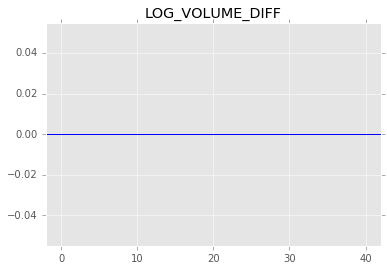

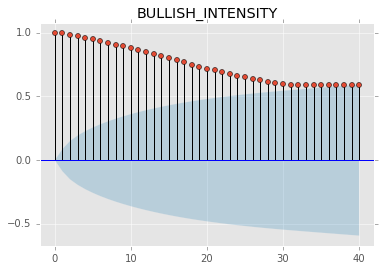

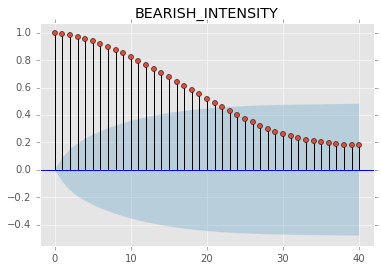

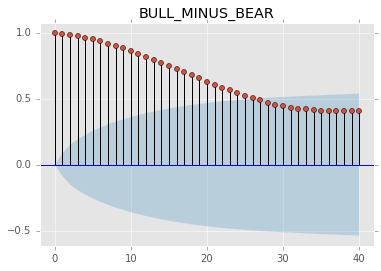

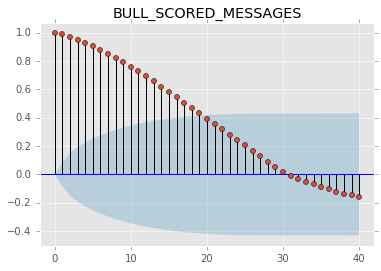

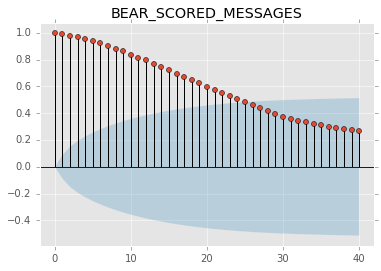

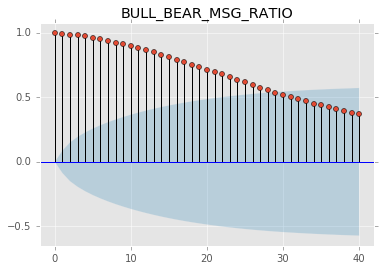

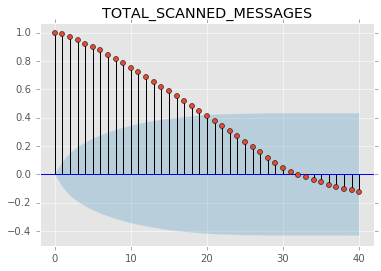

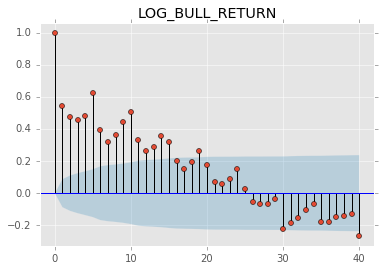

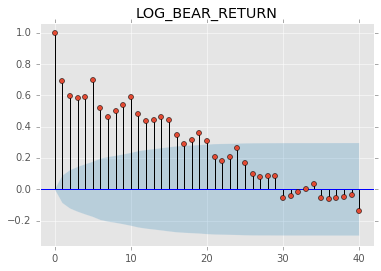

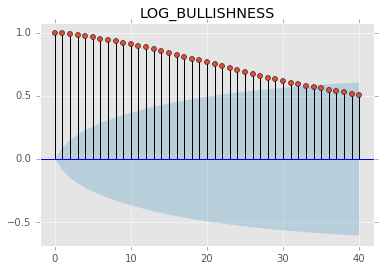

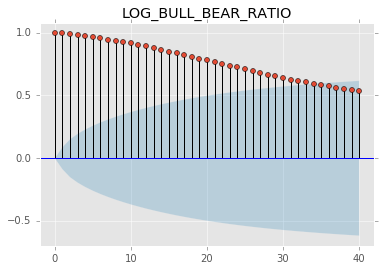

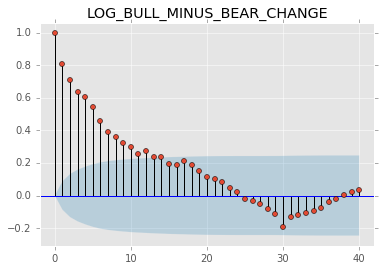

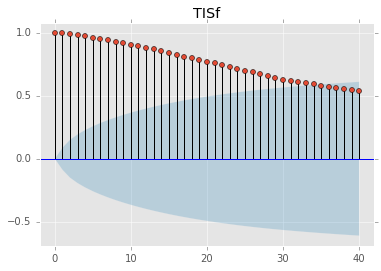

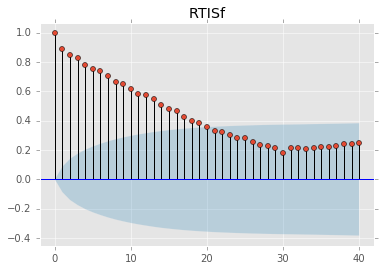

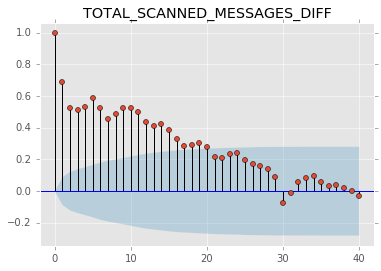

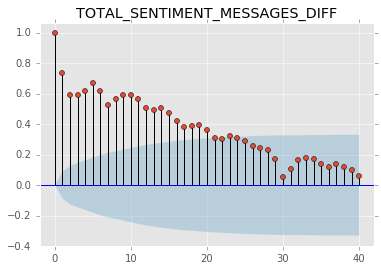

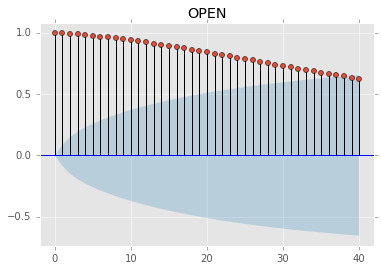

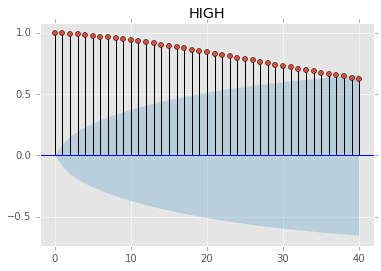

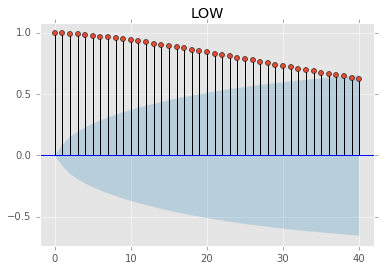

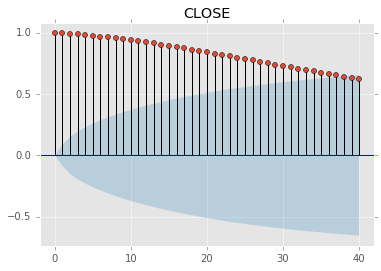

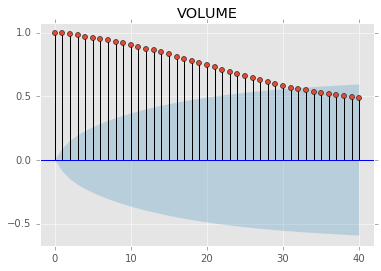

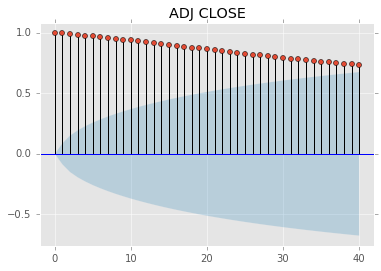

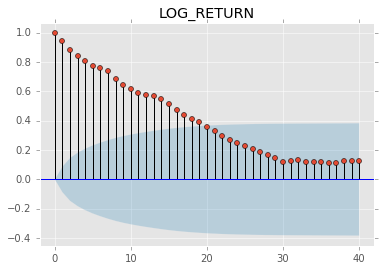

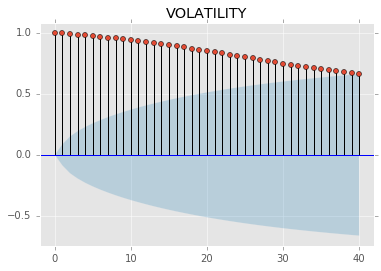

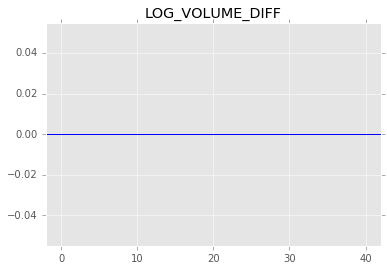

In [24]:
sentisignal.check_acf(data_merged_window)

In [250]:
res_corr_30 = sentisignal.correlation_analysis(data_merged_window, 0.8, data_sentiment, data_finance)

[['BEAR_SCORED_MESSAGES', 'VOLUME', 0.87515916844806874],
 ['BULL_MINUS_BEAR', 'ADJ CLOSE', 0.80455211852022479],
 ['BULL_MINUS_BEAR', 'VOLATILITY', -0.80489573332498821]]


In [251]:
# intensity
print res_corr_30['BULL_MINUS_BEAR']['LOG_RETURN']
print res_corr_30['BULL_MINUS_BEAR']['VOLUME']
# volume
print res_corr_30['LOG_BULLISHNESS']['LOG_RETURN']
print res_corr_30['LOG_BULLISHNESS']['VOLUME']
#

0.491248278657
-0.727252231231
0.571061922539
-0.627527229852


In [252]:
a_sent_price_30 = sentisignal.information_surplus(data_merged_window, 5, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1, True)
a_sent_price_30

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.373289,0
1,0.021401,5.733067,0.394690,-1
2,0.037300,9.992321,0.410589,-2
3,0.031902,8.546127,0.405191,-3
4,0.045096,12.080648,0.418385,-4
5,0.055098,14.760232,0.428387,-5


In [253]:
sentisignal.save_information_surplus(data_pickles, a_sent_price_30, 'AAPL', start_date, end_date, 5, 'BULL_MINUS_BEAR', 'LOG_RETURN', -1, True, window_size)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_30_BULL_MINUS_BEAR_LOG_RETURN_-1_True.p


In [254]:
a_sent_vol_30 = sentisignal.information_surplus(data_merged_window, 5, 'BULL_MINUS_BEAR', 'VOLUME', -1, True)
a_sent_vol_30

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.693571,0
1,0.018730,2.700454,0.712301,-1
2,0.022416,3.231909,0.715987,-2
3,0.023358,3.367856,0.716929,-3
4,0.037962,5.473387,0.731533,-4
5,0.051495,7.424672,0.745066,-5


In [255]:
sentisignal.save_information_surplus(data_pickles, a_sent_vol_30, 'AAPL', start_date, end_date, 5, 'BULL_MINUS_BEAR', 'VOLUME', -1, True, window_size)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_30_BULL_MINUS_BEAR_VOLUME_-1_True.p


In [256]:
a_vol_price_30 = sentisignal.information_surplus(data_merged_window, 5, 'LOG_BULLISHNESS', 'LOG_RETURN', -1, True)
a_vol_price_30

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.490949,0
1,0.020463,4.168127,0.511412,-1
2,0.015070,3.069566,0.506019,-2
3,0.027312,5.563013,0.518261,-3
4,0.007094,1.445003,0.498043,-4
5,-0.001499,-0.305296,0.489450,-5


In [257]:
sentisignal.save_information_surplus(data_pickles, a_vol_price_30, 'AAPL', start_date, end_date, 5, 'LOG_BULLISHNESS', 'LOG_RETURN', -1, True, window_size)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_30_LOG_BULLISHNESS_LOG_RETURN_-1_True.p


In [258]:
a_vol_vol_30 = sentisignal.information_surplus(data_merged_window, 5, 'LOG_BULLISHNESS', 'VOLUME', -1, True)
a_vol_vol_30

,INFORMATION_SURPLUS_DIFF,INFORMATION_SURPLUS_PCT,MUTUAL INFORMATION,SHIFT
0,0.000000,0.000000,0.607391,0
1,0.000390,0.064274,0.607781,-1
2,0.001351,0.222413,0.608742,-2
3,0.009769,1.608430,0.617161,-3
4,0.024776,4.079113,0.632167,-4
5,0.032726,5.387902,0.640117,-5


In [259]:
sentisignal.save_information_surplus(data_pickles, a_vol_vol_30, 'AAPL', start_date, end_date, 5, 'LOG_BULLISHNESS', 'VOLUME', -1, True, window_size)

Saved to pickle: ../../data/pickles/info_surp_res/AAPL_2013-01-01_2015-01-01_30_LOG_BULLISHNESS_VOLUME_-1_True.p


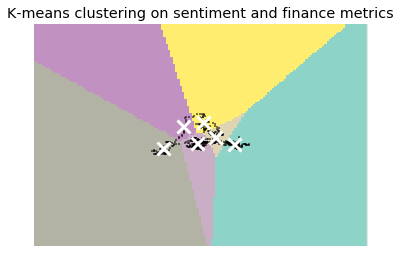

In [261]:
df = data_merged_window
features = ['BULL_MINUS_BEAR', 'LOG_BULLISHNESS', 'LOG_RETURN']
sentisignal.kmeans(df, features)